In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.data.load_final_data import load_final_movies_and_reviews
from src.data.normalize_emotions import*
from src.data.predict_emotions import*
from src.data.merge_genres import*
from src.data.plots import*
%load_ext autoreload
%autoreload 2

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at j-hartmann/emotion-english-distilroberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [3]:
df_movies, df_language, df_countries, df_genres, df_reviews = load_final_movies_and_reviews()
df_movies_with_emotions = merge_df_with_emotions_tsv(df_movies, "data/FinalData/plot_emotions.tsv", "plot")
df_movies_with_emotions_normalized = normalize_total_plot_emotions(df_movies_with_emotions, with_neutral=False)

In [4]:
df_genres = get_genres_merged(df_genres)

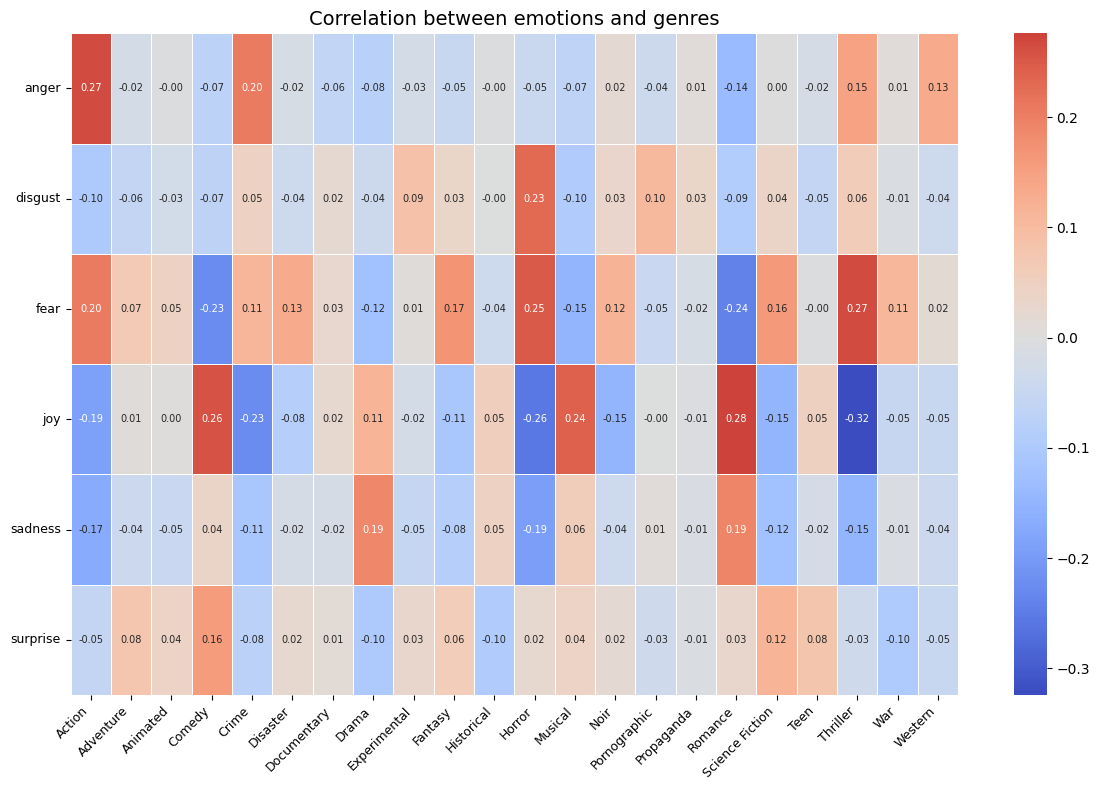

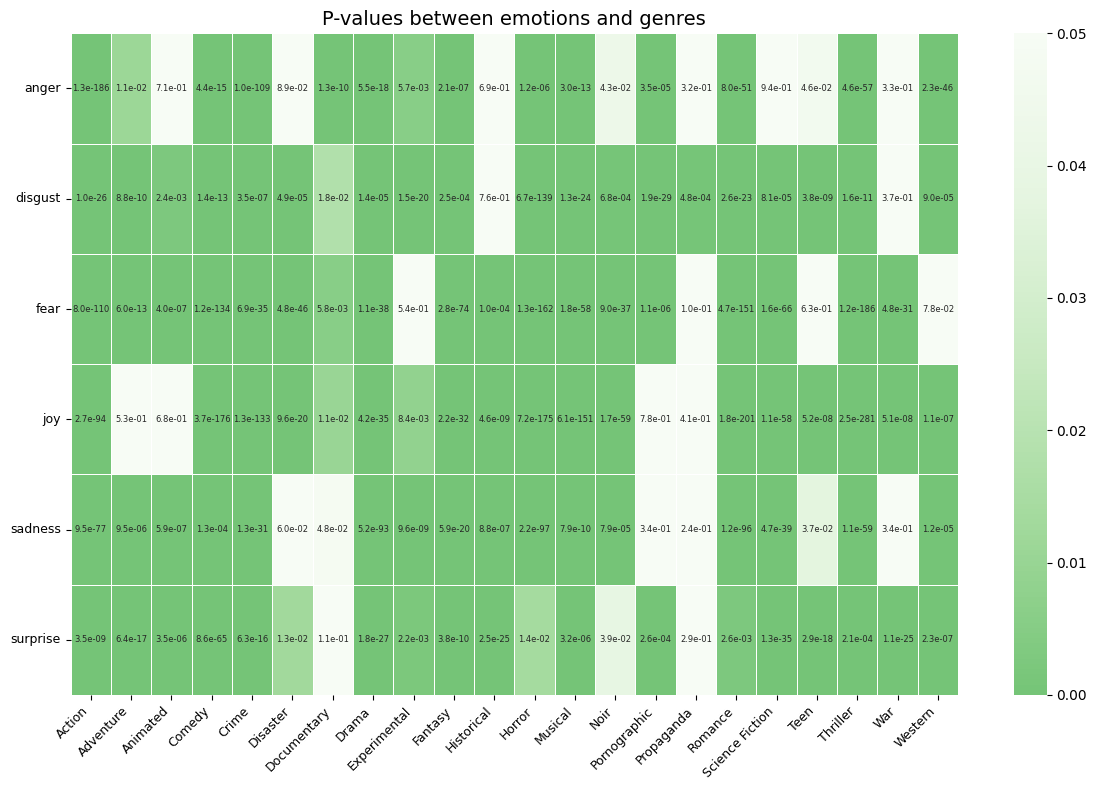

In [44]:
generate_emotion_genre_heatmap(df_genres, df_movies_with_emotions_normalized)

The Pearson correlation test evaluates the relationship between emotions and genres using the following hypotheses: the null hypothesis states that the correlation between a specific emotion and a specific genre is zero, indicating no real linear relationship between the two variables. The alternative hypothesis states that the correlation between the emotion and the genre is not zero, suggesting a significant linear relationship. The results from our heatmaps validate these hypotheses, with high p-values aligning perfectly with near-zero correlations, confirming the absence of meaningful relationships, and low p-values highlighting strong connections between emotions and genres. For instance, joy emerges predominantly in romance, comedy, and musical genres, fear stands out in thriller and action, while disgust and fear dominate horror. Sadness naturally finds its place in drama, where emotional depth is central. In cases where p-values are less than 0.05, we reject the null hypothesis, confirming a meaningful correlation between the emotion and the genre. Conversely, for p-values greater than 0.05, such as historical and anger, we fail to reject the null hypothesis, indicating that the correlation is likely close to zero and not statistically significant.

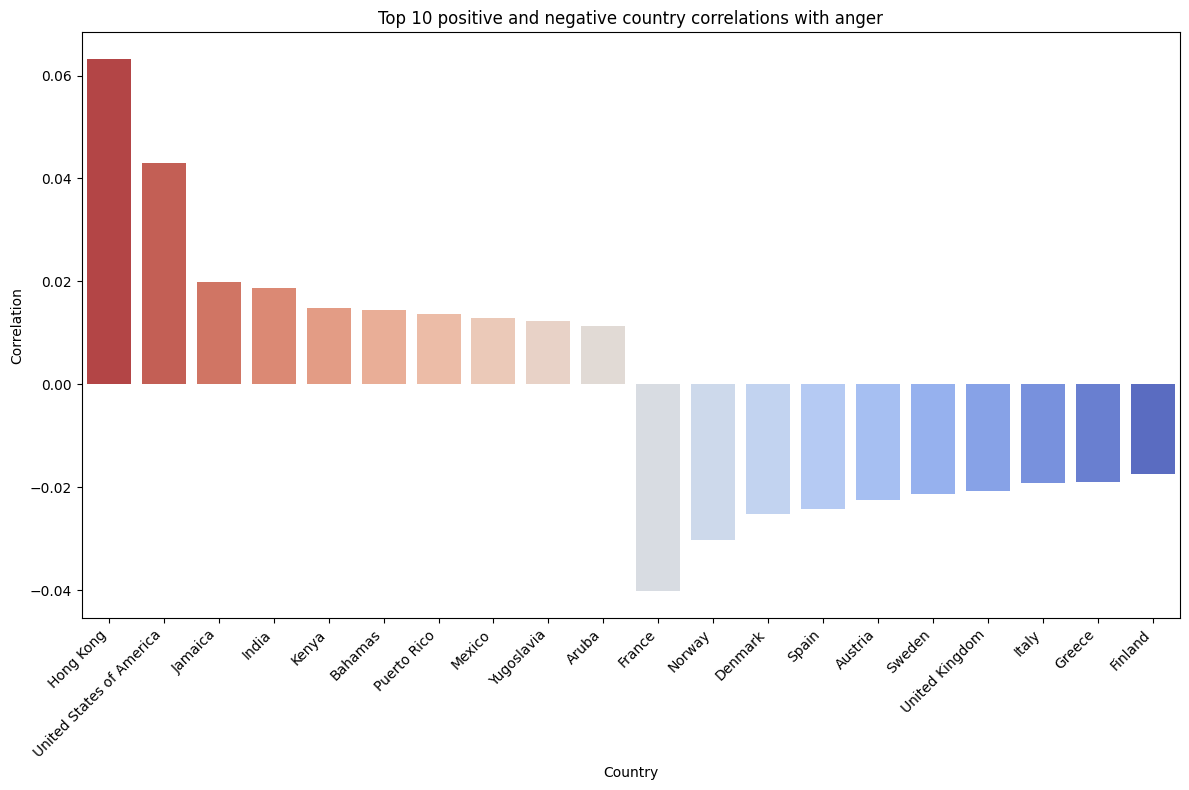

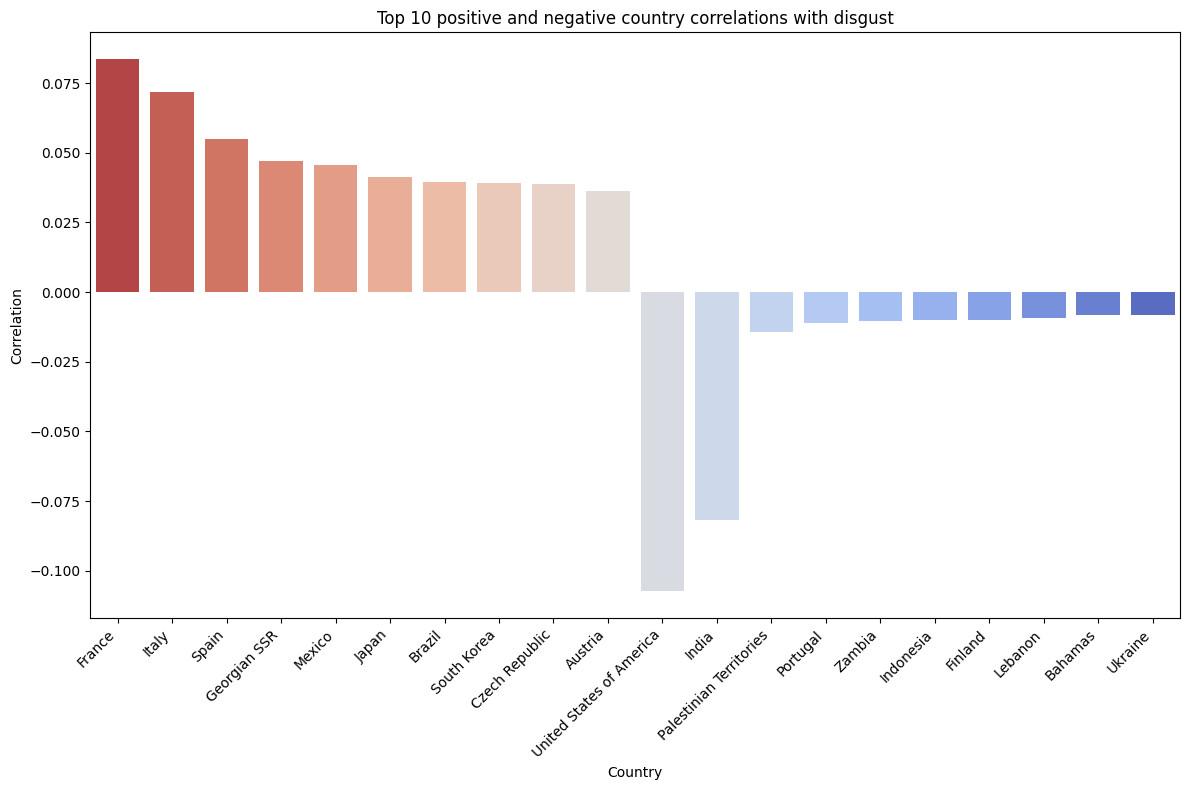

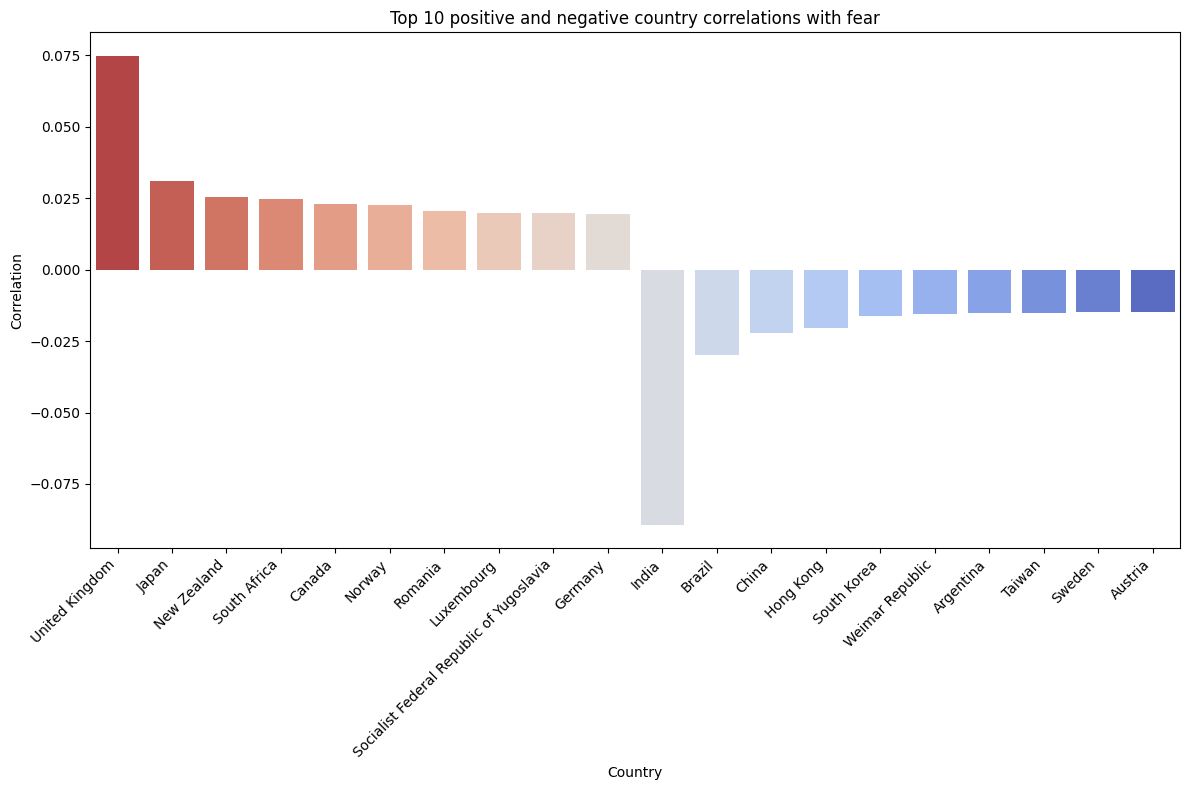

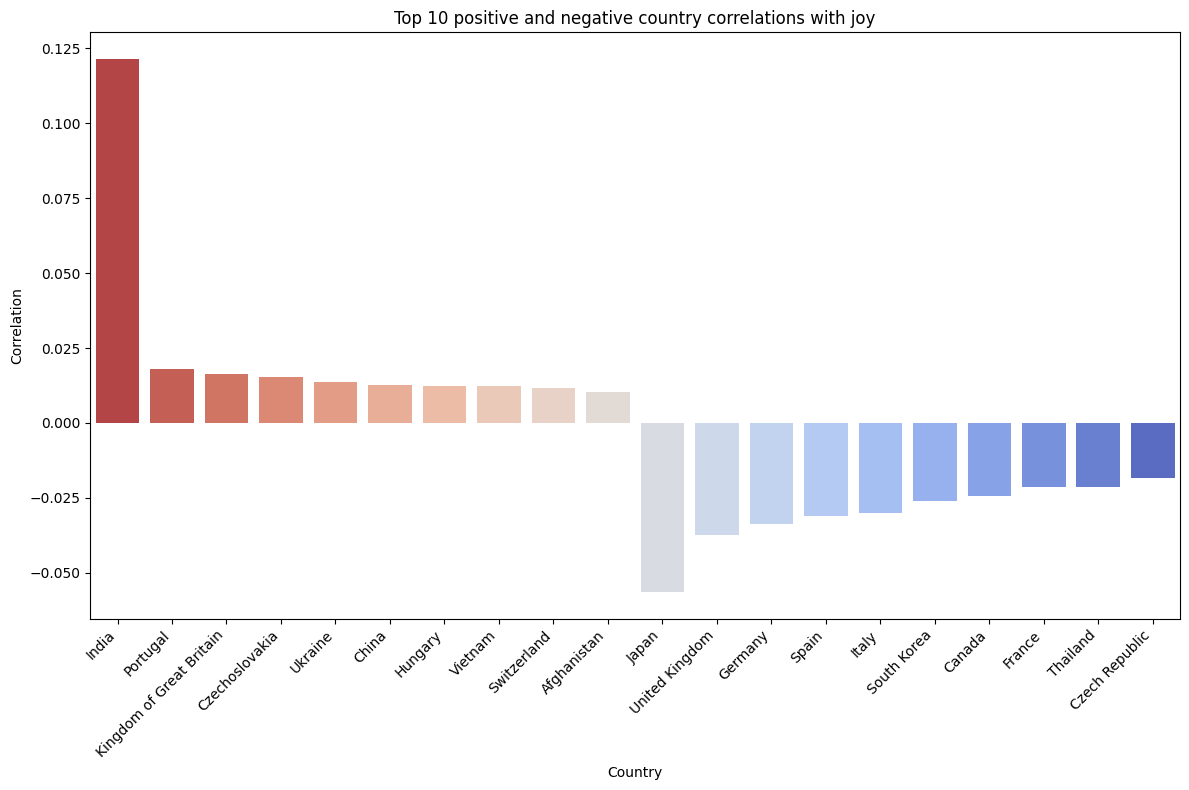

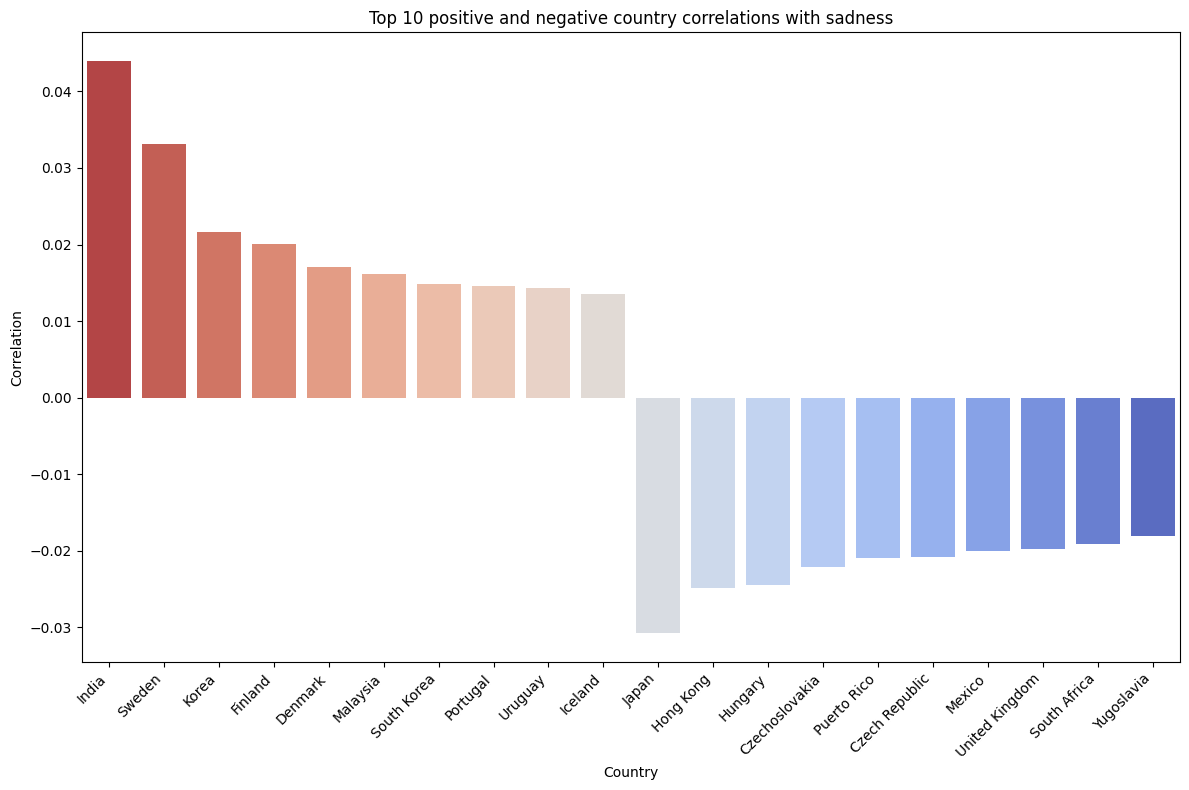

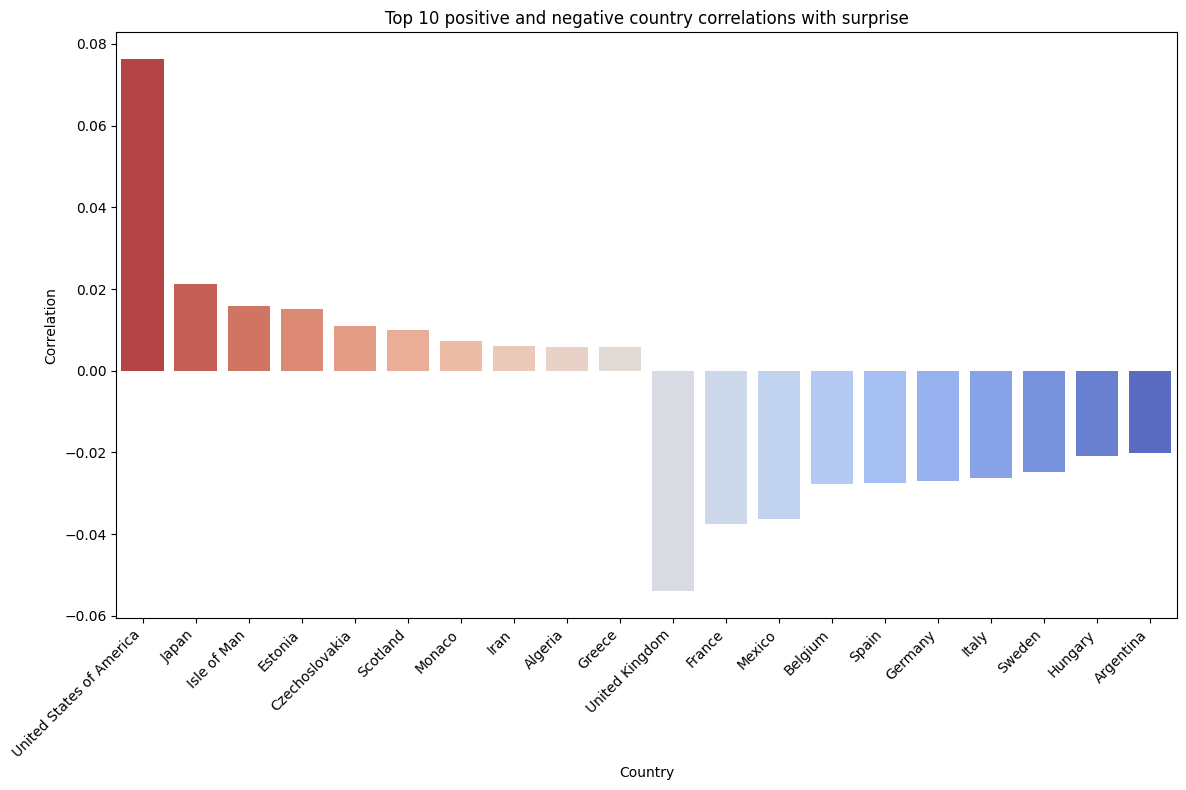

In [6]:
plot_top_country_emotion_correlation(df_movies_with_emotions_normalized, df_countries)

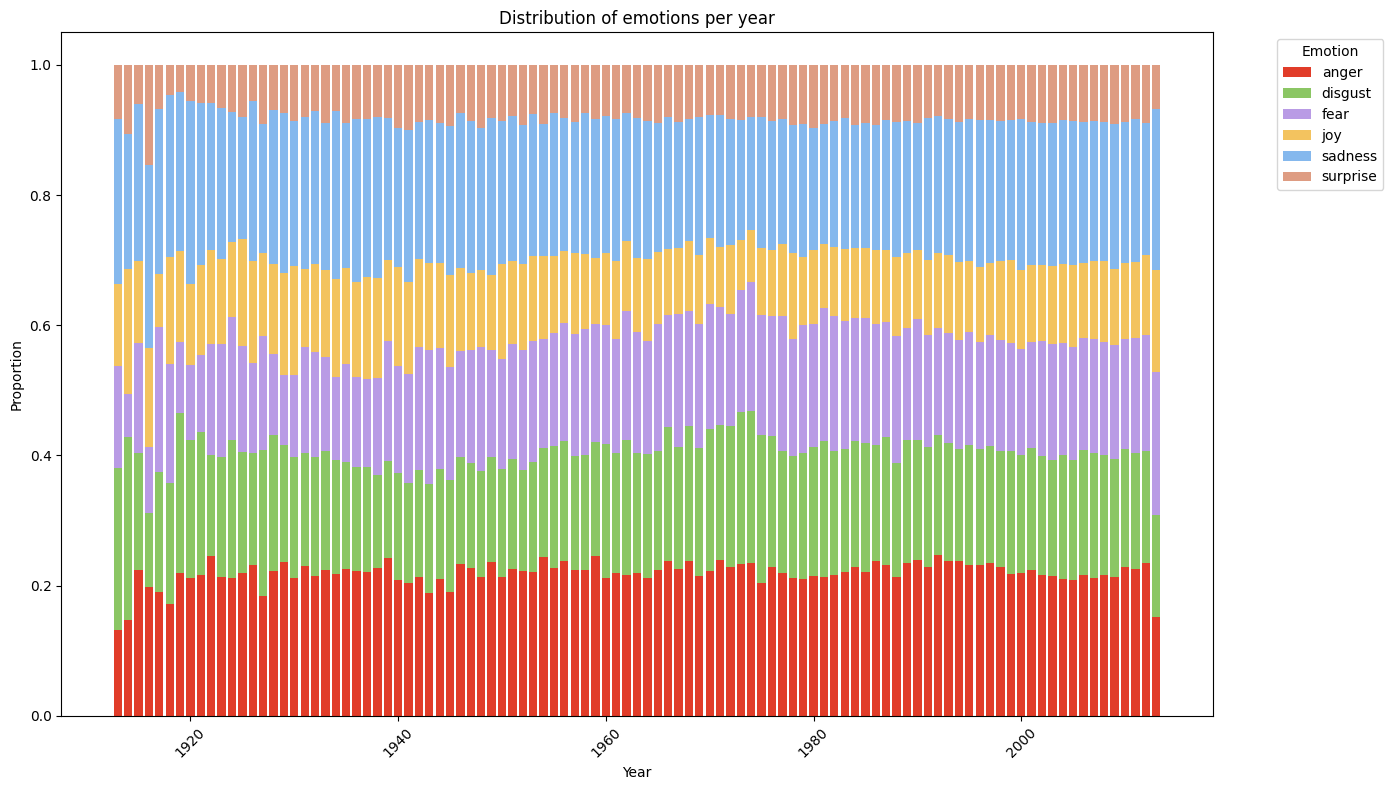

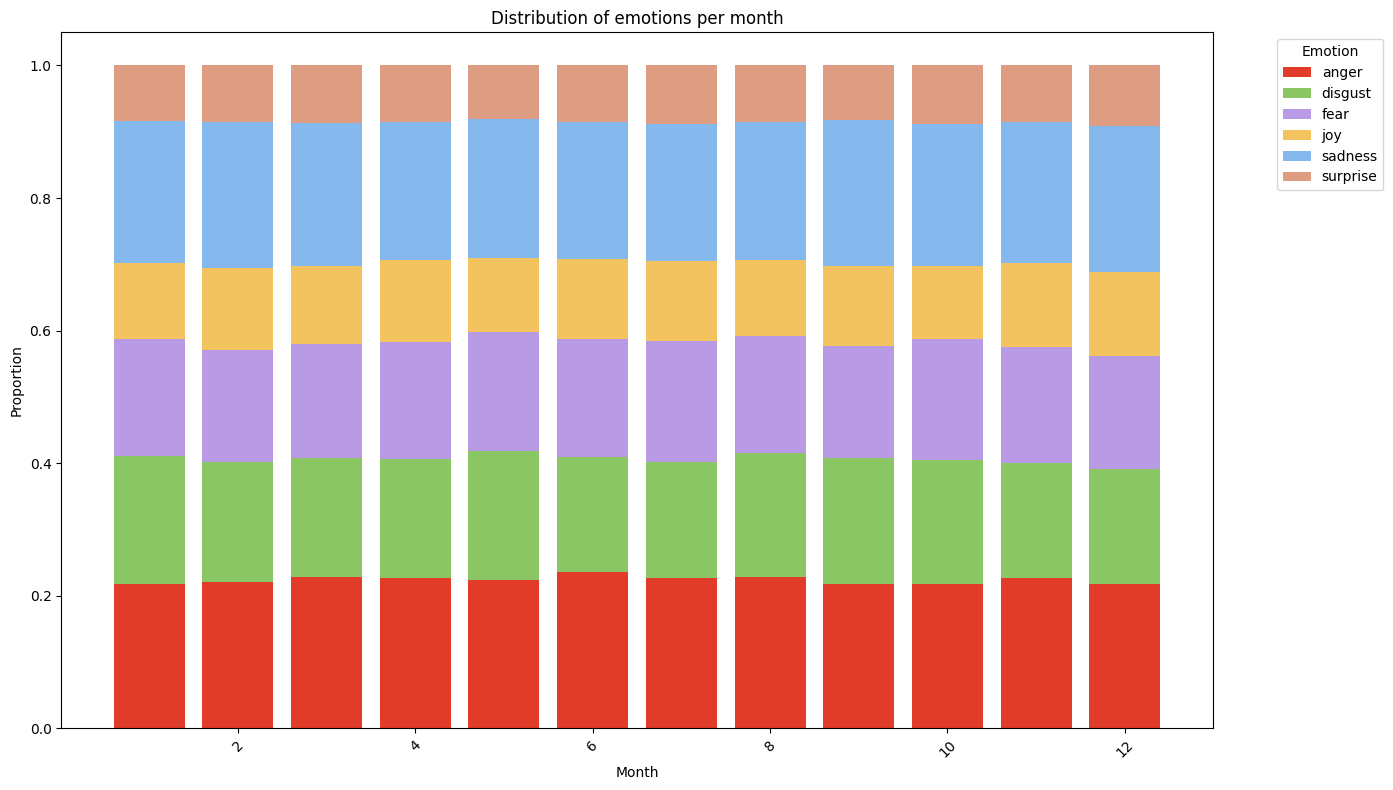

In [7]:
plot_emotion_distribution_per_period(df_movies_with_emotions_normalized, 'release_year')
plot_emotion_distribution_per_period(df_movies_with_emotions_normalized, 'release_month')

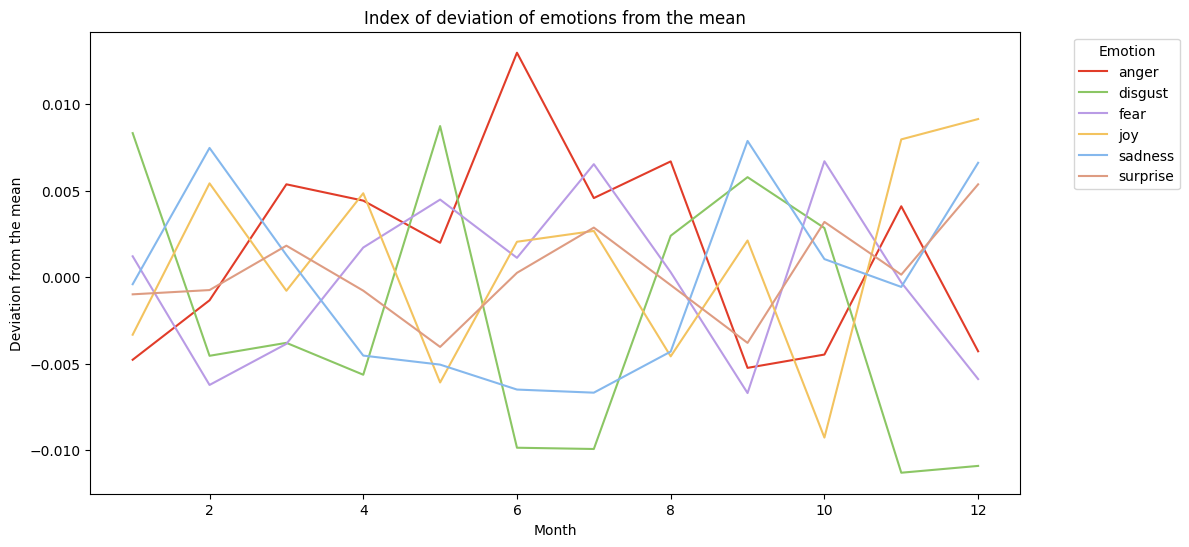

In [8]:
calculate_deviation(dataframe=df_movies_with_emotions_normalized)

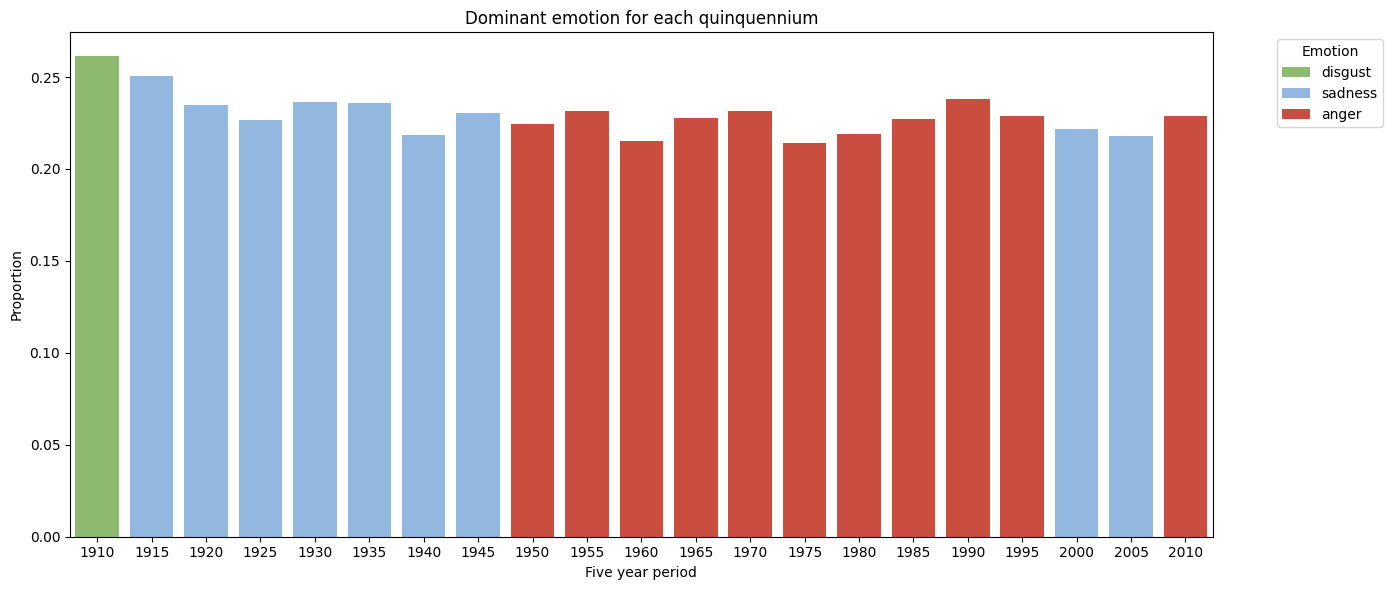

In [9]:
plot_major_emotion_per_five_years(dataframe=df_movies_with_emotions_normalized)